In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVR, SVC
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('face_embeddings_with_gender_age.csv')
df

,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,...,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,Ages,Genders
0,-0.025494,0.122513,0.055114,-0.001496,-0.088866,-0.009604,-0.073408,-0.000792,0.162812,-0.035979,...,-0.040355,-0.037599,-0.115377,-0.040870,-0.020994,-0.053357,-0.073949,-0.011536,26,0
1,-0.056518,0.102773,0.069296,0.010291,-0.034469,-0.066337,-0.048173,-0.006350,0.141323,-0.038721,...,-0.040599,-0.019434,-0.101443,-0.030913,0.002169,-0.047394,-0.045575,-0.023670,21,1
2,-0.047647,0.098760,0.072896,0.012184,-0.050706,-0.053140,-0.063243,-0.001255,0.123143,-0.025310,...,-0.042674,-0.019719,-0.111451,-0.035322,0.006900,-0.039307,-0.044234,-0.014357,17,1
3,-0.054612,0.126905,0.050568,-0.043067,-0.046535,-0.068448,-0.070043,-0.011932,0.178845,-0.038816,...,-0.000717,-0.042208,-0.114430,-0.023632,0.000946,-0.075654,-0.053998,-0.004126,76,0
4,-0.031856,0.129523,0.052840,-0.004791,-0.092374,-0.012239,-0.074684,-0.002876,0.151363,-0.026158,...,-0.036390,-0.043670,-0.111994,-0.036742,-0.007126,-0.044967,-0.069894,-0.010395,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,-0.037702,0.134880,0.035751,-0.019801,-0.063326,-0.025943,-0.039131,-0.005378,0.190400,-0.041484,...,-0.036495,-0.018850,-0.108240,-0.033785,-0.005318,-0.079288,-0.044588,-0.004306,22,1
6354,-0.054044,0.120547,0.058106,-0.003211,-0.094074,-0.012401,-0.088251,-0.008281,0.142571,-0.043437,...,-0.029635,-0.037175,-0.116007,-0.038429,-0.004322,-0.054241,-0.065687,-0.023271,28,0
6355,-0.064457,0.103047,0.067176,-0.028758,-0.079335,-0.058462,-0.087105,0.009979,0.107945,-0.014568,...,-0.026586,-0.039076,-0.115230,-0.024781,0.018826,-0.032704,-0.044839,-0.012364,10,0
6356,-0.055449,0.140963,0.046610,0.010393,-0.063270,-0.049991,-0.055318,-0.019226,0.105366,0.005508,...,-0.047505,-0.014345,-0.106747,-0.071223,-0.004357,-0.049238,-0.059489,-0.015720,8,1


In [3]:
# Separate features and labels
X = df.iloc[:, :-2]  # Assuming the first columns are face embeddings
y_age = df['Ages']
y_gender = df['Genders']

In [12]:
df['Ages'].value_counts()

Ages
1      559
2      262
26     204
8      165
4      160
      ... 
87       2
110      2
100      1
91       1
99       1
Name: count, Length: 98, dtype: int64

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(
    X, y_age, y_gender, test_size=0.2, random_state=42
)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train the age prediction model (SVR)
age_model = SVR()
age_model.fit(X_train, y_age_train)

SVR()

In [7]:
# Train the gender classification model (SVC)
gender_model = SVC()
gender_model.fit(X_train, y_gender_train)

SVC()

In [8]:
# Make predictions
y_age_pred = age_model.predict(X_test)
y_gender_pred = gender_model.predict(X_test)

In [9]:
# Evaluate age prediction model
mae = mean_absolute_error(y_age_test, y_age_pred)
print("Mean Absolute Error (MAE) for Age Prediction:", mae)

# Evaluate gender classification model
print("Gender Classification Report:")
print(classification_report(y_gender_test, y_gender_pred))

Mean Absolute Error (MAE) for Age Prediction: 19.259087112588087
Gender Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.33      0.40       523
           1       0.63      0.79      0.70       749

    accuracy                           0.60      1272
   macro avg       0.57      0.56      0.55      1272
weighted avg       0.58      0.60      0.58      1272



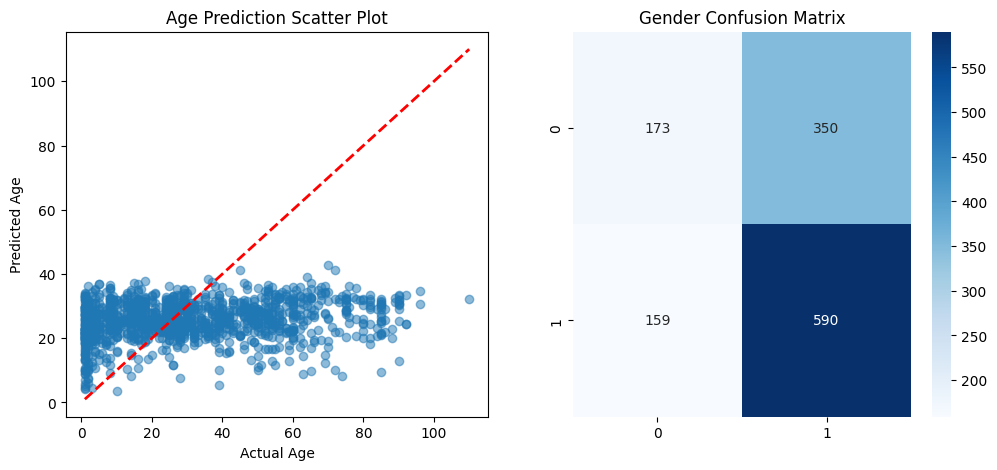

In [10]:
# Create confusion matrix heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age scatter plot for predictions vs actual values
axes[0].scatter(y_age_test, y_age_pred, alpha=0.5)
axes[0].plot([min(y_age_test), max(y_age_test)], [min(y_age_test), max(y_age_test)], linestyle='--', color='red', linewidth=2)
axes[0].set_xlabel('Actual Age')
axes[0].set_ylabel('Predicted Age')
axes[0].set_title('Age Prediction Scatter Plot')

# Gender confusion matrix
cm_gender = confusion_matrix(y_gender_test, y_gender_pred)
sns.heatmap(cm_gender, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Gender Confusion Matrix')

plt.show()

In [11]:
import joblib

# Save the age prediction model
joblib.dump(age_model, 'age_model.pkl')

# Save the gender classification model
joblib.dump(gender_model, 'gender_model.pkl')


['gender_model.pkl']